In [9]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import missingno as msno
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [10]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,VITI,MUAJI,Regjimi,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
0,2024,1,IM4,BG - BULLGARIA,8413703090 - Pompat forcuese glandless per sis...,20.0,4896.050,295.00,0.00,0.0,0.00
1,2024,1,IM4,CN - KINA,8504406090 - Te Tjera,2112.0,38670.837,6846.92,3285.70,0.0,7552.19
2,2024,1,IM4,CZ - REPUBLIKA QEKE,8504406090 - Te Tjera,1.0,146.850,1.00,14.69,0.0,29.08
3,2024,1,IM4,EC - EKUADORI,0603110000 - Trendafilat,240.0,197.340,11.84,19.73,0.0,39.07
4,2024,1,IM4,NL - HOLANDA,0603197000 - Te tjera,12920.0,9193.170,1423.24,0.00,0.0,1654.77


C:\Users\njomz\AppData\Local\Temp\ipykernel_9992\1583274710.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')


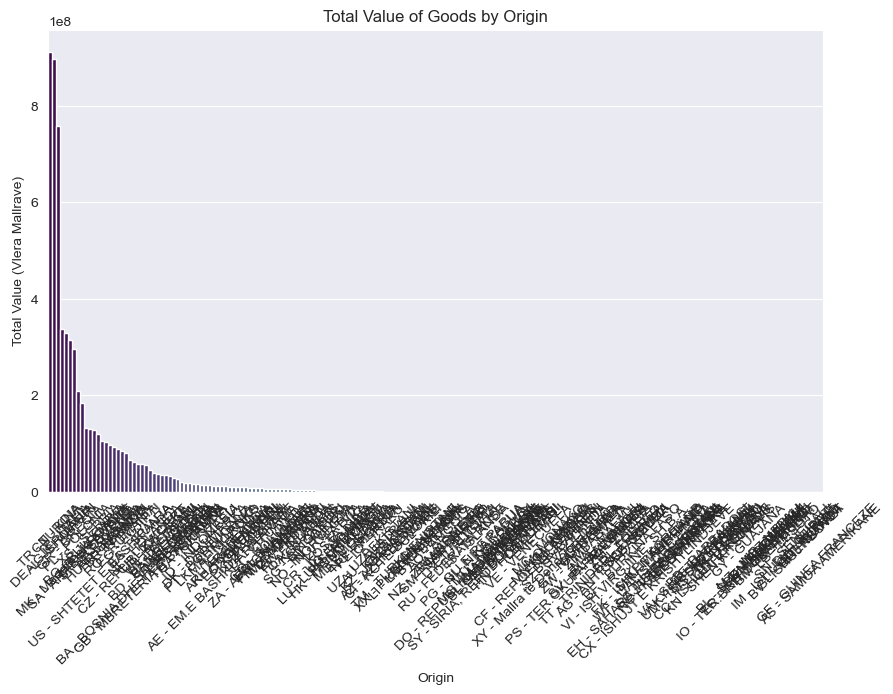

In [11]:
grouped = df.groupby('Origjina')['Vlera Mallrave'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped.values, palette='viridis')
plt.title('Total Value of Goods by Origin')
plt.xlabel('Origin')
plt.ylabel('Total Value (Vlera Mallrave)')
plt.xticks(rotation=45)
plt.show()

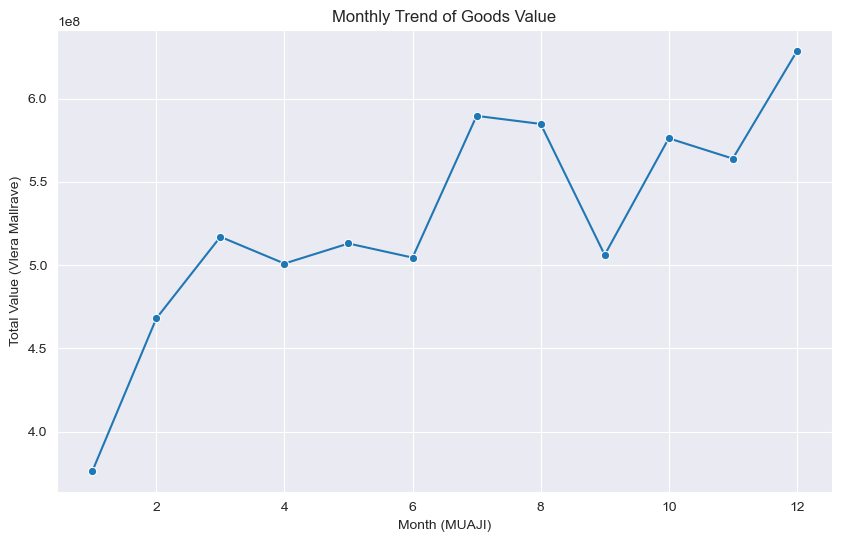

In [12]:
monthly = df.groupby('MUAJI')['Vlera Mallrave'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
plt.title('Monthly Trend of Goods Value')
plt.xlabel('Month (MUAJI)')
plt.ylabel('Total Value (Vlera Mallrave)')
plt.grid(True)
plt.show()

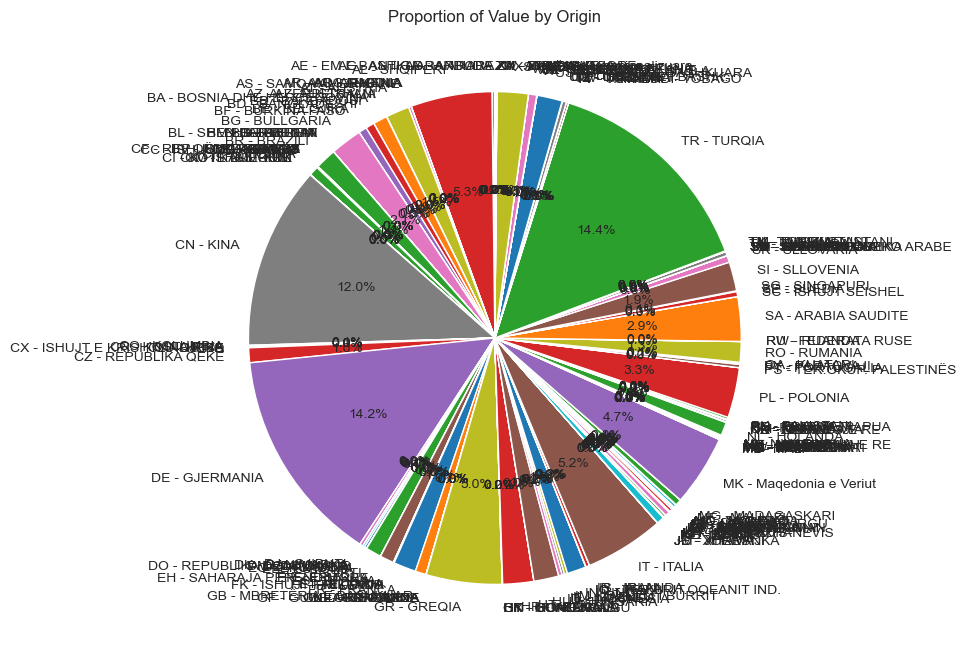

In [13]:
# Group and sum,
grouped = df.groupby('Origjina')['Vlera Mallrave'].sum()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Value by Origin')
plt.show()

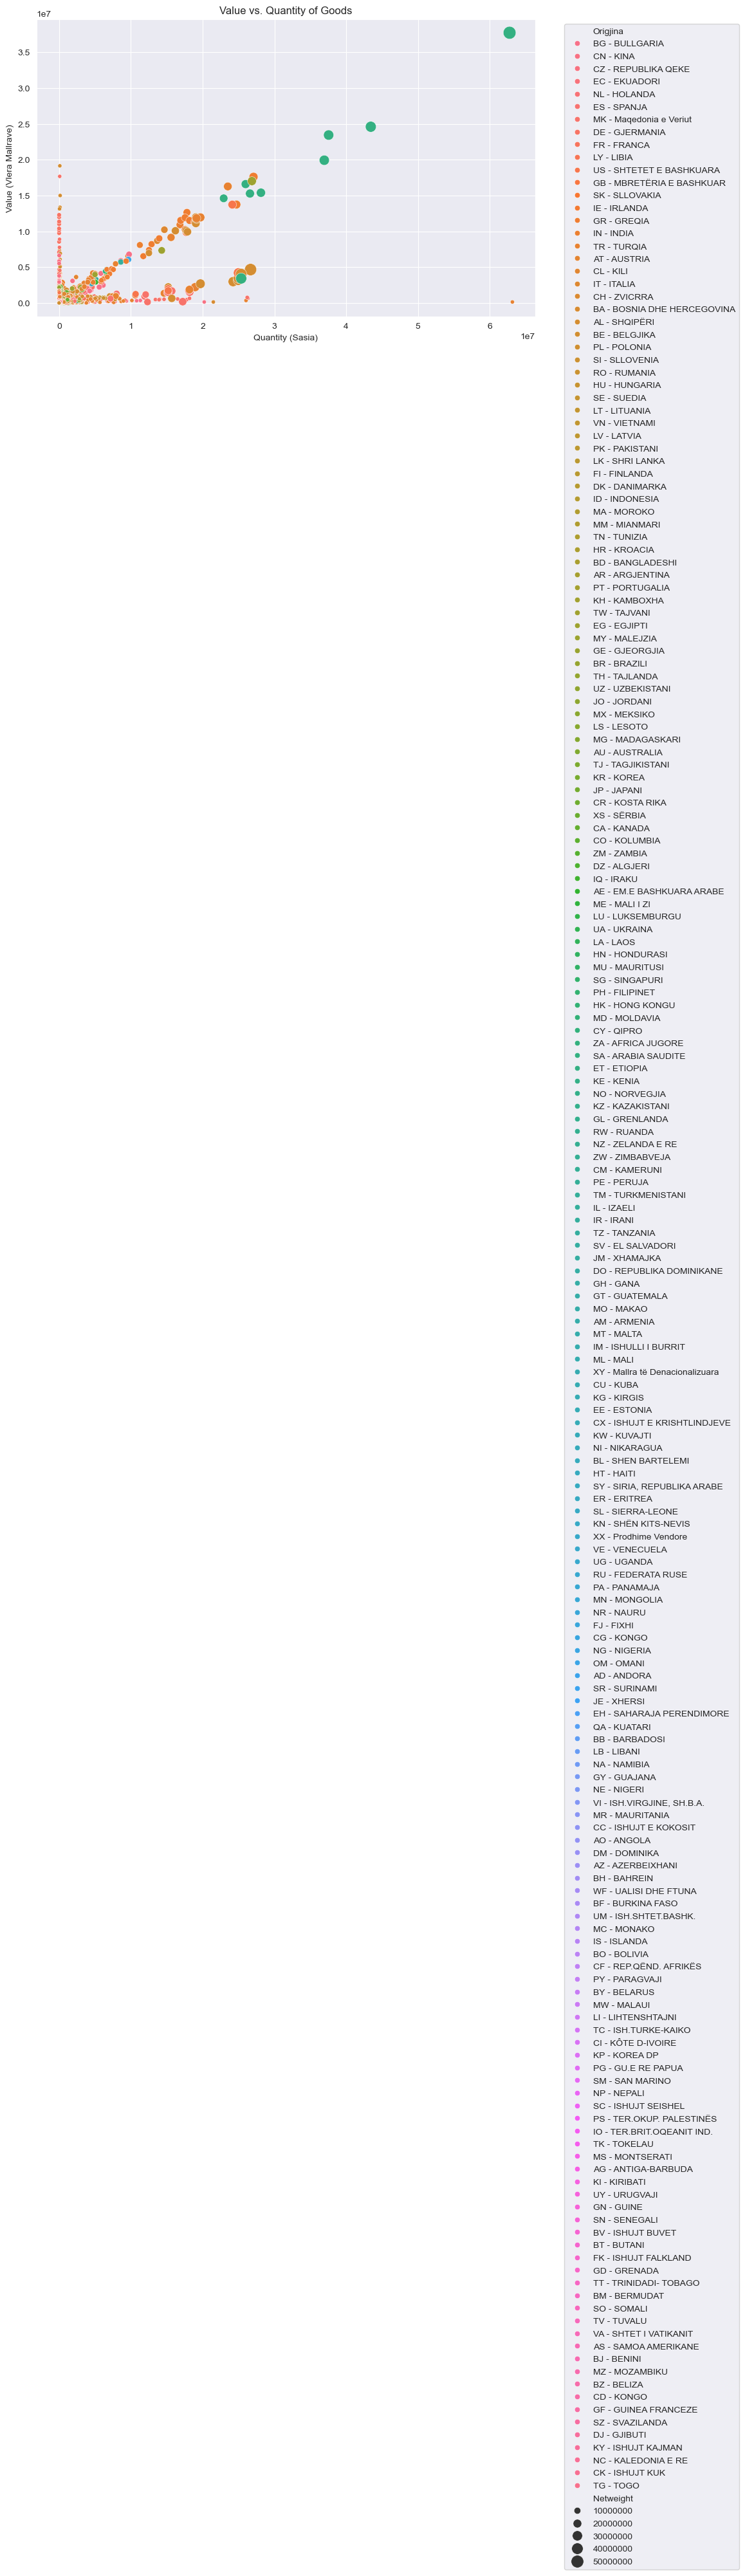

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sasia', y='Vlera Mallrave', data=df, hue='Origjina', size='Netweight', sizes=(20, 200))
plt.title('Value vs. Quantity of Goods')
plt.xlabel('Quantity (Sasia)')
plt.ylabel('Value (Vlera Mallrave)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
# Select numerical columns,
numerical = df[['Sasia', 'Vlera Mallrave', 'Netweight', 'Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']]

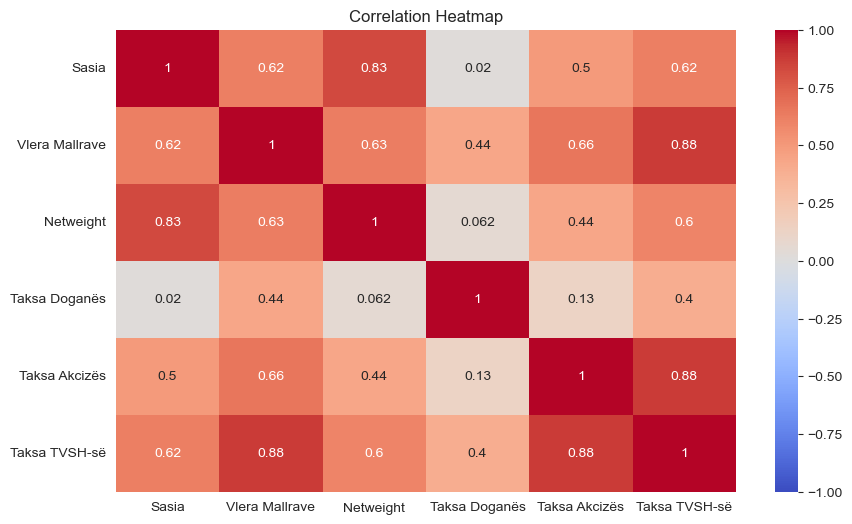

In [16]:
# Plot correlation heatmap,
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Group by origin and sum taxes
taxes = df.groupby('Origjina')[['Taksa Doganës', 'Taksa Akcizës', 'Taksa TVSH-së']].sum()

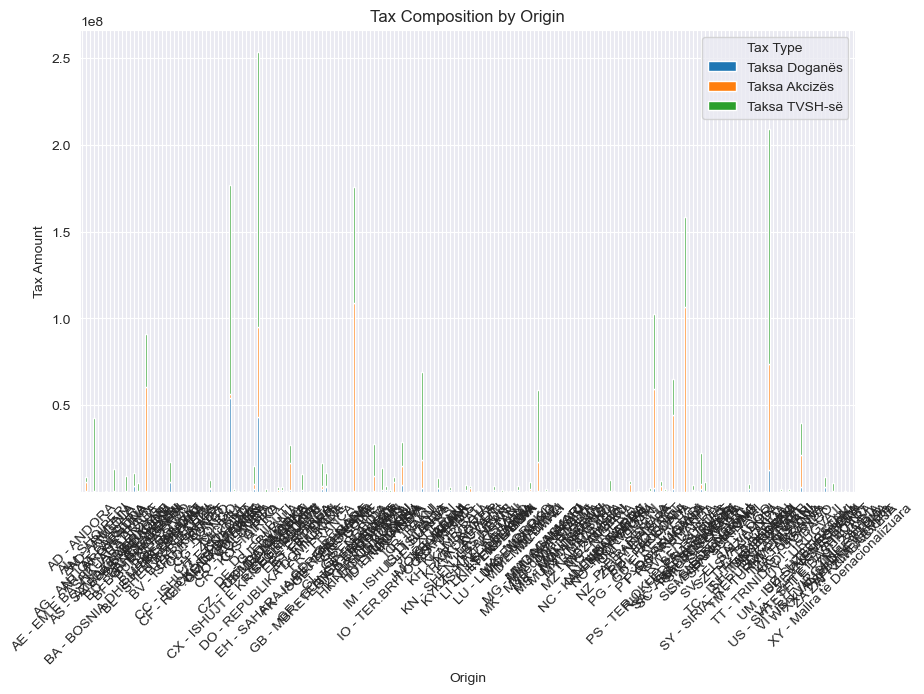

In [18]:
# Plot
taxes.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tax Composition by Origin')
plt.xlabel('Origin')
plt.ylabel('Tax Amount')
plt.xticks(rotation=45)
plt.legend(title='Tax Type')
plt.show()

In [ ]:
g = sns.FacetGrid(df, col='Origjina', col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, 'MUAJI', 'Vlera Mallrave', marker='o')
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Value (Vlera Mallrave)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Monthly Value Trends by Origin', fontsize=16)
plt.show()